Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

Tutorial Digital Signal Processing (Course #24505),
**DFT to DTFT Interpolation with the Periodic Sinc Function**,
Winter Semester 2019/20

Feel free to contact lecturer frank.schultz@uni-rostock.de

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

In [1]:
%matplotlib inline
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
#from scipy import signal
from scipy import fftpack
from scipy import special

# DFT to DTFT Interpolation with the Periodic Sinc Function

The DFT spectrum $X[\mu]$ can be interpolated towards the DTFT spectrum $X(\Omega)$ with

\begin{equation}
X(\Omega)=\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{-\mathrm{j}\frac{\left(\Omega-\frac{2\pi}{N}\mu\right)(N-1)}{2}}\cdot\text{psinc}_N\left(\Omega-\frac{2\pi}{N}\mu\right).
\end{equation}

The interpolation kernel utilises the so-called **periodic sinc function**

\begin{align}
\text{psinc}_N(\Omega)=\begin{cases}\frac{1}{N}\cdot\frac{\sin\left(\frac{N}{2}\Omega\right)}{\sin\left(\frac{1}{2}\Omega\right)}&\text{for }\Omega\neq2\pi m\\
(-1)^{m(N-1)}&\text{for }\Omega=2\pi m\end{cases},\,\,m\in\mathbb{Z},
\end{align}

which is also known as aliased sinc and Dirichlet function.

Below, we give an example graph for $\text{psinc}_N(\Omega)$.
Note that the orange dots indicate the DFT eigenfrequencies.

In [2]:
def dft2dtft(X, W):
    N = len(X)
    Xi = np.zeros(len(W), dtype='complex')
    for i, Omega in enumerate (W):
        for mu_dft in range(N):
            Xi[i] += X[mu_dft] *\
            np.exp(-1j/2*(Omega - 2*np.pi/N*mu_dft)*(N-1)) *\
            special.diric(Omega - 2*np.pi/N*mu_dft, N)
    return Xi

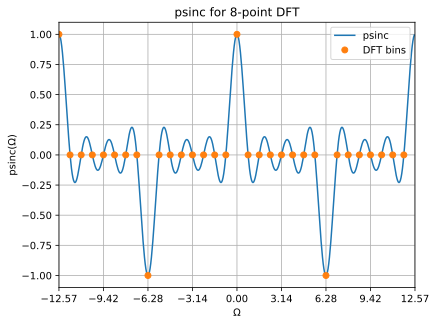

In [3]:
K = 3

N_DFT = 2**K
Omega_DFT = np.arange(-2*N_DFT, 2*N_DFT) * 2*np.pi/N_DFT

N = 2**(K+4)
Omega = np.arange(-2*N, 2*N) * 2*np.pi/N

psinc_DFT = special.diric(Omega_DFT, N_DFT)
psinc = special.diric(Omega, N_DFT)

plt.plot(Omega,psinc,label='psinc')
plt.plot(Omega_DFT,psinc_DFT,'o',label='DFT bins')

plt.xlim(-4*np.pi,4*np.pi)
plt.xticks(np.arange(-4,5,1)*np.pi)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'psinc($\Omega$)')
plt.title('psinc for '+str(N_DFT)+'-point DFT')
plt.legend()
plt.grid(True)


Note, that this interpolation implies:
- the DFT $X[\mu]$ stems from a signal $x[k]$ for which periodicity of $N$ is inherent, we assume the first period at $0\leq k\leq N-1$ 
- the DFT spectrum is discrete and $N$ periodic
- the DTFT spectrum stems from the signal $x[k]$ for $0\leq k\leq N-1$, for all other $k$ is $x[k]=0$, i.e. considering only one period
- the DTFT spectrum is continuous and $2\pi$ periodic, which means that the signal $x[k]$ can not be periodic


## Task: DFT Analysis Using a Rectangular Window

A cosine signal
- $x[k]=\cos(\Omega k + \pi/4)$ with
- $\Omega=2\cdot\frac{2\pi}{N}$, 
- $N=8$,
- $0\leq k \leq N-1$
is to be analysed with the DFT 

\begin{align}
X[\mu]=\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Assume that $x[k]$ results from continuous-time signal $x(t)$ using a (very low) sampling frequency of $f_s=10$ Hz.

1. Calculate the spectrum $X[\mu]$ of $x[k]$ and visualise the real and imaginary part as well as the magnitude and the phase of $X[\mu]$ over $0\leq\mu\leq N-1$.

2. Check the expected symmetries.

3. Implement the above mentioned interpolation and visualise the resulting magnitude spectrum $|X_i[\mu]|$
over $\mu$, $\Omega$ as well as physical frequency $f$.

4. Repeat the steps 1) to 3) for $N=9$. What is different?

5. Repeat the steps 1) to 4) for $\Omega=2.5\cdot\frac{2\pi}{N}$. What is different now?


In [4]:
N = 8  # N = 8 or N = 9
mu_bwcase = 2  # mu_bwcase = 2 (best case) or mu_bwcase = 2.5 (worst case)

k = np.arange(0,N)
mu = np.arange(0,N)
x = np.cos(mu_bwcase * 2*np.pi/N * k + np.pi/4)
X = fftpack.fft(x)
fs = 10  # sampling frequency in Hz

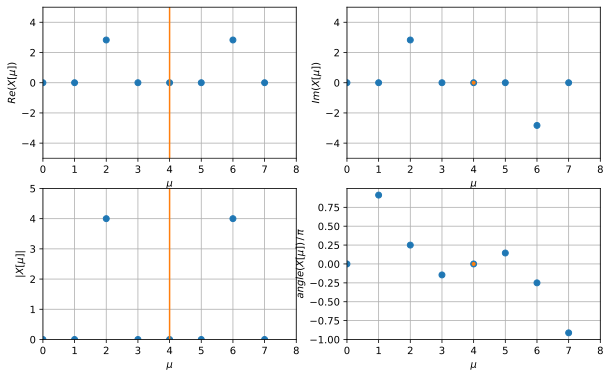

In [5]:
# 1.
# 2. (orange line / orange dot for axial / point symmetry)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.plot(mu, np.real(X),'o')
plt.plot([N/2, N/2],[-5,5])
plt.xlim(0,N)
plt.ylim(-5,5)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$Re(X[\mu])$')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mu, np.imag(X),'o')
plt.plot([N/2],[0], 'o',ms=3)
plt.xlim(0,N)
plt.ylim(-5,5)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$Im(X[\mu])$')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(mu, np.abs(X),'o')
plt.plot([N/2, N/2],[-5,5])
plt.xlim(0,N)
plt.ylim(0,5)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X[\mu]|$')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(mu, np.angle(X)/np.pi,'o')
plt.plot([N/2],[0], 'o',ms=3)
plt.xlim(0,N)
plt.ylim(-1,1)
plt.yticks(np.arange(-4,4)*0.25)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$angle(X[\mu])\,/\,\pi$')
plt.grid(True)

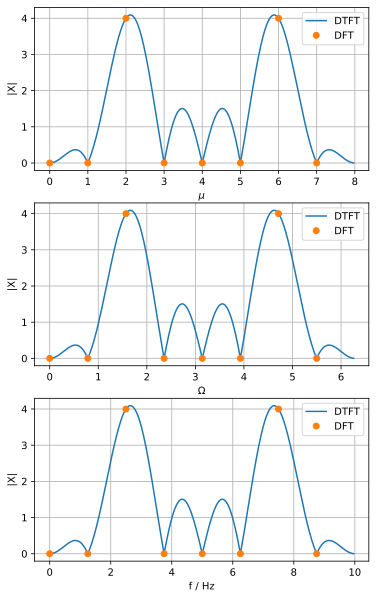

In [6]:
# 3.
Ni = 2**8
W = np.arange(0,Ni) * 2*np.pi/Ni  # Omega for which to interpolate to DTFT
f = W / (2*np.pi) * fs  # physical frequency based on W using fs
mui = W / (2*np.pi) * N  # frequency vector normalized to integer frequencies

Xi = dft2dtft(X, W)  # DTFT interpolation from DFT

plt.figure(figsize=(6,10))

plt.subplot(3,1,1)
plt.plot(mui, np.abs(Xi), label='DTFT')
plt.plot(mu,np.abs(X),'o', label='DFT')
plt.xlabel(r'$\mu$')
plt.ylabel('|X|')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(W, np.abs(Xi), label='DTFT')
plt.plot(2*np.pi/N*mu,np.abs(X),'o', label='DFT')
plt.xlabel(r'$\Omega$')
plt.ylabel('|X|')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(f, np.abs(Xi), label='DTFT')
plt.plot(mu*fs/N,np.abs(X),'o', label='DFT')
plt.xlabel(r'f / Hz')
plt.ylabel('|X|')
plt.legend()
plt.grid(True)

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises